In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

ZADANIE 1 - RUCHY BROWNA W 1D

Text(0.5, 1.0, 'Brownian motion in 1D')

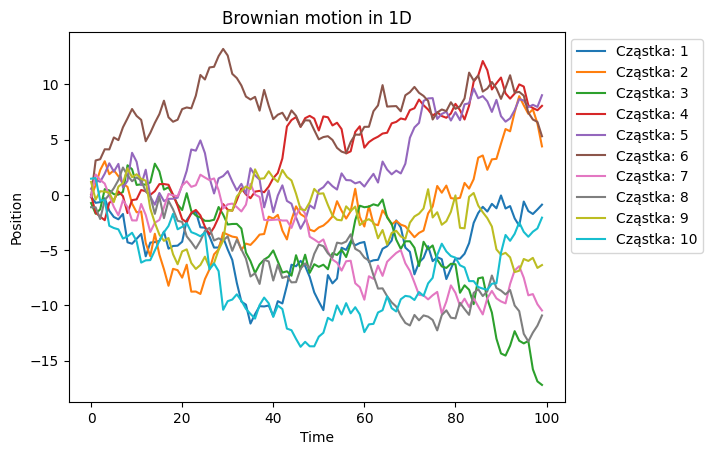

In [2]:
# Stałe początkowe

particleNum = 10
time = 100

# Obliczenia

positions = np.random.randn(particleNum, time)
positions = np.cumsum(positions, axis = 1)

# Wykres

opis = []
for particle in range(particleNum):
    plt.plot(positions[particle, :])
    opis.append('Cząstka: {}'.format(particle + 1))

plt.legend(opis, bbox_to_anchor = (1,1))
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Brownian motion in 1D')

ZADANIE 2 - RUCHY BROWNA W 2D

Text(0.5, 1.0, 'Brownian motion in 2D')

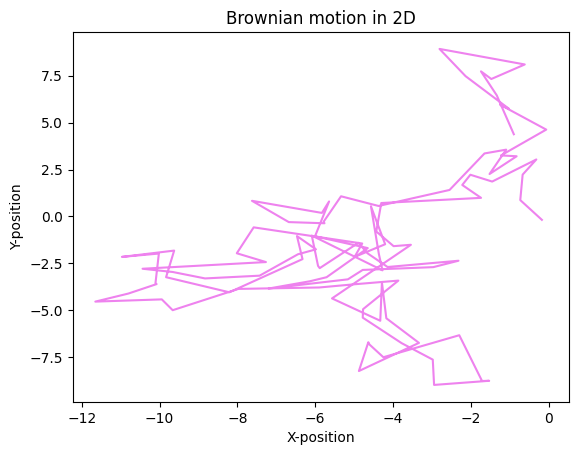

In [3]:
time2 = 100

positions2 = np.random.randn(2, time2)
positions2 = np.cumsum(positions2, axis = 1)

plt.plot(positions[0,:], positions[1,:], color = 'violet')
plt.xlabel('X-position')
plt.ylabel('Y-position')
plt.title('Brownian motion in 2D')

ZADANIE 3 - HISTOGRAM RUCHÓW BROWNA

Text(0.5, 1.0, 'Numerical and analytical plot of Brownian motion')

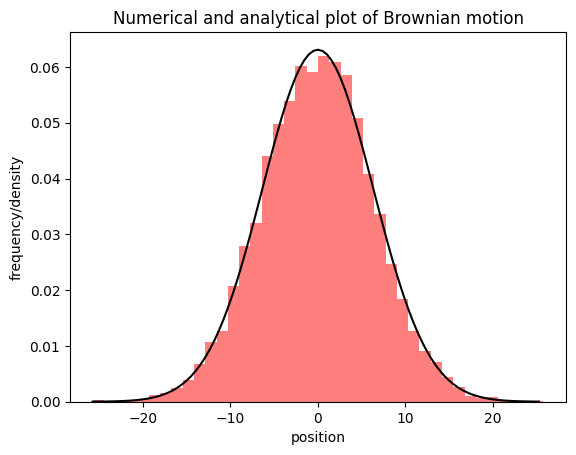

In [4]:
# Stałe początkowe

particleNum3 = 10000
time3 = 10
motionConst = 2

# Przygotowujemy listę końcowych pozycji ruchów brownowskich pod histogram

finalPositions = []
for particle in range(particleNum3):
    finalPositions.append(np.sum(np.random.randn(particleNum3, time3)[particle]));
finalPositions = [value * math.sqrt(2 * motionConst) for value in finalPositions]

# Przygotowujemy wykres funkcji

def diffusion(x, t, D):
    return 1/math.sqrt(4*math.pi*D*t)*math.exp(-x**2/(4*D*t))

inf = np.min(finalPositions)
sup = np.max(finalPositions)
step = (sup-inf)/100

x = []
f_x = []
for i in range(100):
    x.append(inf + i*step)
    f_x.append(diffusion(inf+i*step, time3, motionConst))

# Drukujemy wykresy

plt.hist(finalPositions, bins = 40, density = 'true', alpha = 0.5, color = 'red')
plt.plot(x, f_x, color = 'black')
plt.xlabel('position')
plt.ylabel('frequency/density')
plt.title('Numerical and analytical plot of Brownian motion')

ZADANIE DODATKOWE

Text(0.5, 1.0, 'Numerical and analytical MSE')

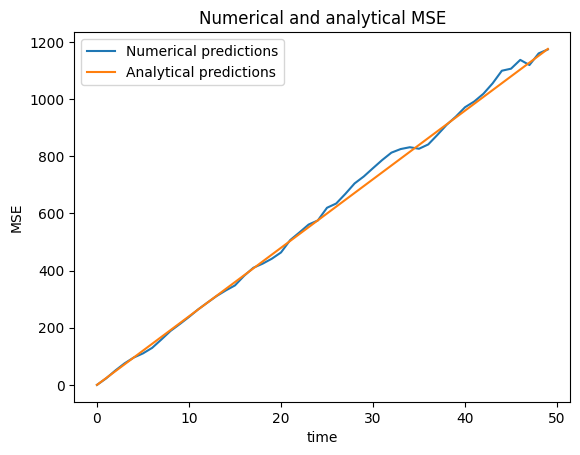

In [6]:
# Stałe początkowe

particleNum4 = 500
time4 = 50
motionConst = 12

# Obliczenia numeryczne

positions4 = np.random.randn(particleNum4, time4)
positions4 = np.cumsum(positions4, axis = 1)

# Funkcja eksperymentalnego błędu średniokwadratowego

def MSE(positionsArray, time):
    if(time == 0):
        return 0
    else:
        column = positionsArray[:, time - 1]
        column = [i**2 for i in column]
        return np.mean(column)

# Przygotowanie wektorów do wykreślenia

t = range(time4)
numeric_t = [2 * motionConst * MSE(positions4, i) for i in t]
analytic_t = [2 * motionConst * i for i in t]

# Drukowanie wykresu
opis = []
plt.plot(t, numeric_t)
opis.append('Numerical predictions')
plt.plot(t, analytic_t)
opis.append('Analytical predictions')
plt.xlabel('time')
plt.ylabel('MSE')
plt.legend(opis)
plt.title('Numerical and analytical MSE')
        